In [1]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd


In [26]:
#set the file path and load the shapefile
shp_path = './Shapefiles/IL_BNDY_County/IL_BNDY_County_Py.shp'
#prj_path = './Shapefiles/IL_BNDY_County/IL_BNDY_County_Py.prj'
il_shp_path = '/Users/ricardo/Box Sync/IECAM-Temp-Working/Maps/2010_FPLs.shp'

map_df_old = gpd.read_file(shp_path)
map_df = gpd.read_file(il_shp_path)
#map_prj_df.describe()

In [27]:
#check data type so we can see that this is not a normal datagrame, but a GEOdataframe
map_df.head()

,County,geocode,County_1,pop05,fpl50,fpl50_0,fpl50_1,fpl50_2,fpl50_3,fpl50_4,...,fpl400_3,fpl400_4,fpl400_5,pFPL50,pFPL100,pFPL130,pFPL185,pFPL200,pFPL400,geometry
0,Adams,05000US17001,Adams,5103.0,218.0,34.0,36.0,36.0,37.0,38.0,...,757.0,769.0,767.0,0.042720,0.210856,0.301783,0.449931,0.474231,0.878699,"POLYGON ((126019.5707734248 4410099.685015807,..."
1,Alexander,05000US17003,Alexander,686.0,207.0,39.0,34.0,36.0,32.0,37.0,...,76.0,86.0,73.0,0.301749,0.351312,0.443149,0.443149,0.443149,0.718659,"POLYGON ((298054.2466073505 4111461.622887869,..."
2,Bond,05000US17005,Bond,1145.0,75.0,12.0,11.0,12.0,14.0,13.0,...,155.0,142.0,136.0,0.065502,0.142358,0.186900,0.484716,0.506550,0.714410,"POLYGON ((305196.7300992218 4322309.668910157,..."
3,Boone,05000US17007,Boone,4560.0,918.0,132.0,131.0,152.0,160.0,172.0,...,686.0,735.0,730.0,0.201316,0.267982,0.384430,0.483991,0.542544,0.863377,"POLYGON ((359081.2832929078 4668234.343812802,..."
4,Brown,05000US17009,Brown,369.0,31.0,5.0,5.0,5.0,5.0,5.0,...,50.0,45.0,60.0,0.084011,0.124661,0.222222,0.471545,0.544715,0.818428,"POLYGON ((166399.7524989591 4446696.416739956,..."


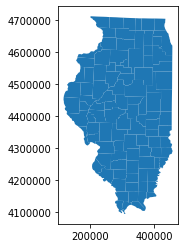

In [28]:
#I need to install descartes to be able to plot this geopandas
#pip install descartes
map_df.plot()
#map_df_old.plot()

In [29]:
#load in the data for Illinois Counties
multi_year_poverty_file = './data/multiyear-185perce-poverty-level.xlsx'
df_poverty = pd.read_excel(multi_year_poverty_file,skiprows=1)

#Select data for number of children 5 and under for every year
df_children_five_under = df_poverty.iloc[:,[i for i in range(0, 91, 7)]]

#grab the first row for the header
new_header = df_children_five_under.iloc[0] 

#take the data less the head row
df_children_five_under = df_children_five_under[1:]

#set the header row as the dataframe header
df_children_five_under.columns = new_header

#change the column name year to counties
df_children_five_under = df_children_five_under.rename(columns = {'year': 'County'}).reset_index(drop=True)
df_children_five_under.head()


,County,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Adams,1972,1528,1801,1447,2422,2067,2396,2405,2361,2383,2399,2130
1,Alexander,378,357,364,285,484,489,526,591,570,571,548,544
2,Bond,886,809,852,516,766,1047,1093,721,638,609,597,527
3,Boone,1446,1320,1748,1808,2280,1977,1860,1721,1539,1502,1479,1412
4,Brown,179,164,173,162,139,119,112,92,92,92,95,146


In [32]:
#Convert all columns to string
df_children_five_under.columns = list(map(str, df_children_five_under.columns))

#Set as index the county
df_children_five_under.set_index('County', inplace=True)

#Change index values to upper case
#Doing this because I will be using a shapefile where the counties are all in upper case

#With new shapfile, I do not need to change county names to uppercase
#df_children_five_under.index = df_children_five_under.index.map(str.upper)

df_children_five_under.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
County,,,,,,,,,,,,
Adams,1972,1528,1801,1447,2422,2067,2396,2405,2361,2383,2399,2130
Alexander,378,357,364,285,484,489,526,591,570,571,548,544
Bond,886,809,852,516,766,1047,1093,721,638,609,597,527
Boone,1446,1320,1748,1808,2280,1977,1860,1721,1539,1502,1479,1412
Brown,179,164,173,162,139,119,112,92,92,92,95,146


In [51]:
#Calculate the percent change between years
df_percent_change_years_poverty = df_children_five_under

df_percent_change_years_poverty = df_percent_change_years_poverty.pct_change(axis='columns').drop(['2005'],axis=1).mul(100)
df_percent_change_years_poverty.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
County,,,,,,,,,,,
Adams,-22.515213,17.866492,-19.655747,67.380788,-14.657308,15.916788,0.375626,-1.829522,0.931809,0.671423,-11.213005
Alexander,-5.555556,1.960784,-21.703297,69.824561,1.033058,7.566462,12.357414,-3.553299,0.175439,-4.028021,-0.729927
Bond,-8.690745,5.315204,-39.436620,48.449612,36.684073,4.393505,-34.034767,-11.511789,-4.545455,-1.970443,-11.725293
Boone,-8.713693,32.424242,3.432494,26.106195,-13.289474,-5.918058,-7.473118,-10.575247,-2.404159,-1.531292,-4.530088
Brown,-8.379888,5.487805,-6.358382,-14.197531,-14.388489,-5.882353,-17.857143,0.000000,0.000000,3.260870,53.684211


In [52]:
#multiply by 100 to make it percent
#df_percent_change_years_poverty = df_percent_change_years_poverty.mul(100)
#df_percent_change_years_poverty.head()

The percent data contains COOK county data separated by:

COOK-CHICAGO

COOK-SUBURBS

COOK-TOTAL

We are going to use COOK-TOTAL data and we will rename the index to just COOK so it can match with the GEopandas sahpefile.



In [53]:
#Show all counties
df_percent_change_years_poverty[df_percent_change_years_poverty.index.str.startswith('Cook')]



,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
County,,,,,,,,,,,
Cook - Chicago,-6.852216,-0.209265,3.974507,4.316120,-11.059974,-0.265978,0.217111,-3.396307,-0.857297,-0.517401,-3.357771
Cook - Suburbs,-1.224182,-5.500826,13.162054,-0.475469,-2.276731,1.995203,1.336069,-1.256374,-0.854726,-0.514841,-3.695385
Cook - Total,-5.008867,-2.011462,6.992169,2.651560,-8.101694,0.543883,0.623660,-2.613304,-0.856343,-0.516451,-3.483030


In [54]:
df_percent_change_years_poverty.describe()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,-8.455066,5.448445,0.584918,12.738246,-0.863307,3.909060,-1.295373,-2.925181,-1.818149,-1.089487,-1.641262
std,4.304089,13.222822,21.793500,20.316621,15.157608,9.306035,12.495200,10.115743,2.179012,1.985937,12.361567
min,-29.295154,-31.766860,-39.436620,-36.630037,-39.943074,-25.986842,-44.585987,-27.586207,-9.189189,-8.653846,-32.067511
25%,-8.747312,0.379906,-14.093152,-0.432675,-10.521070,-1.474292,-7.569124,-8.452916,-2.860742,-1.804584,-7.881840
50%,-8.688799,5.286905,-1.655372,9.516016,-1.148586,2.938349,-0.486896,-2.818392,-1.743004,-0.890166,-1.973565
75%,-8.607357,6.291491,10.419694,23.014118,6.966422,8.279761,5.686287,1.763954,-0.492865,-0.086755,3.730307
max,5.586668,53.488372,97.920380,79.561316,57.024793,34.579439,30.516432,33.928571,2.485380,3.260870,53.684211


In [55]:
#delete COOK-CHICAGO and COOK-SUBURBS
df_percent_change_years_poverty = df_percent_change_years_poverty.drop(['Cook - Chicago', 'Cook - Suburbs'])


In [56]:
#Check clolumns were dropped
df_percent_change_years_poverty[df_percent_change_years_poverty.index.str.startswith('Cook')]


,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
County,,,,,,,,,,,
Cook - Total,-5.008867,-2.011462,6.992169,2.65156,-8.101694,0.543883,0.62366,-2.613304,-0.856343,-0.516451,-3.48303


I will rename the COOK - TOTAL index to COOK so it matches the GEOdataframe data


In [57]:
#Rename Index label from Cook - Total to Cook
df_percent_change_years_poverty.rename(index = {'Cook - Total': 'Cook'}, inplace = True)
df_percent_change_years_poverty[df_percent_change_years_poverty.index.str.startswith('Cook')]

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
County,,,,,,,,,,,
Cook,-5.008867,-2.011462,6.992169,2.65156,-8.101694,0.543883,0.62366,-2.613304,-0.856343,-0.516451,-3.48303


In [58]:
df_percent_change_years_poverty.describe()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,-8.541672,5.611258,0.428381,12.950362,-0.749483,3.968755,-1.336000,-2.936923,-1.837014,-1.100730,-1.604295
std,4.282677,13.295659,21.969457,20.456348,15.272209,9.386412,12.614628,10.213944,2.196230,2.003847,12.480461
min,-29.295154,-31.766860,-39.436620,-36.630037,-39.943074,-25.986842,-44.585987,-27.586207,-9.189189,-8.653846,-32.067511
25%,-8.747847,1.207979,-14.981405,-0.245688,-10.422606,-1.691088,-7.761137,-8.573034,-2.861130,-1.847967,-8.384477
50%,-8.690066,5.290490,-2.085521,10.153074,-0.481403,3.148731,-0.706834,-2.818392,-1.760752,-0.929259,-1.804387
75%,-8.623791,7.445901,9.969864,23.084906,7.189590,8.287558,5.708567,1.800106,-0.486039,-0.028918,3.783515
max,5.586668,53.488372,97.920380,79.561316,57.024793,34.579439,30.516432,33.928571,2.485380,3.260870,53.684211


Now that the GEOdataframe and data dataframe have the same County names, we can use this to join both dataframes

map_df has the column COUNTY_NAM for all counties names and data dataframe has the index label with the county names


In [106]:
#before I can merge, I need to reset the indexes so I can have column name COUNTY
#which I wil luse to merge the two dataframes
df_percent_change_years_poverty = df_percent_change_years_poverty.reset_index()
df_percent_change_years_poverty.describe()

,index,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,50.500000,-8.541672,5.611258,0.428381,12.950362,-0.749483,3.968755,-1.336000,-2.936923,-1.837014,-1.100730,-1.604295
std,29.588849,4.282677,13.295659,21.969457,20.456348,15.272209,9.386412,12.614628,10.213944,2.196230,2.003847,12.480461
min,0.000000,-29.295154,-31.766860,-39.436620,-36.630037,-39.943074,-25.986842,-44.585987,-27.586207,-9.189189,-8.653846,-32.067511
25%,25.250000,-8.747847,1.207979,-14.981405,-0.245688,-10.422606,-1.691088,-7.761137,-8.573034,-2.861130,-1.847967,-8.384477
50%,50.500000,-8.690066,5.290490,-2.085521,10.153074,-0.481403,3.148731,-0.706834,-2.818392,-1.760752,-0.929259,-1.804387
75%,75.750000,-8.623791,7.445901,9.969864,23.084906,7.189590,8.287558,5.708567,1.800106,-0.486039,-0.028918,3.783515
max,101.000000,5.586668,53.488372,97.920380,79.561316,57.024793,34.579439,30.516432,33.928571,2.485380,3.260870,53.684211


In [60]:
#Check the column name I will be using to merge the map dataframe with the data
map_df.head()

#Use the column County to merge dataframes

,County,geocode,County_1,pop05,fpl50,fpl50_0,fpl50_1,fpl50_2,fpl50_3,fpl50_4,...,fpl400_3,fpl400_4,fpl400_5,pFPL50,pFPL100,pFPL130,pFPL185,pFPL200,pFPL400,geometry
0,Adams,05000US17001,Adams,5103.0,218.0,34.0,36.0,36.0,37.0,38.0,...,757.0,769.0,767.0,0.042720,0.210856,0.301783,0.449931,0.474231,0.878699,"POLYGON ((126019.5707734248 4410099.685015807,..."
1,Alexander,05000US17003,Alexander,686.0,207.0,39.0,34.0,36.0,32.0,37.0,...,76.0,86.0,73.0,0.301749,0.351312,0.443149,0.443149,0.443149,0.718659,"POLYGON ((298054.2466073505 4111461.622887869,..."
2,Bond,05000US17005,Bond,1145.0,75.0,12.0,11.0,12.0,14.0,13.0,...,155.0,142.0,136.0,0.065502,0.142358,0.186900,0.484716,0.506550,0.714410,"POLYGON ((305196.7300992218 4322309.668910157,..."
3,Boone,05000US17007,Boone,4560.0,918.0,132.0,131.0,152.0,160.0,172.0,...,686.0,735.0,730.0,0.201316,0.267982,0.384430,0.483991,0.542544,0.863377,"POLYGON ((359081.2832929078 4668234.343812802,..."
4,Brown,05000US17009,Brown,369.0,31.0,5.0,5.0,5.0,5.0,5.0,...,50.0,45.0,60.0,0.084011,0.124661,0.222222,0.471545,0.544715,0.818428,"POLYGON ((166399.7524989591 4446696.416739956,..."


In [61]:
#Merge both dataframes
merged = map_df.set_index('County').join(df_percent_change_years_poverty.set_index('County'))

merged.head()

,geocode,County_1,pop05,fpl50,fpl50_0,fpl50_1,fpl50_2,fpl50_3,fpl50_4,fpl50_5,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
County,,,,,,,,,,,,,,,,,,,,,
Adams,05000US17001,Adams,5103.0,218.0,34.0,36.0,36.0,37.0,38.0,38.0,...,17.866492,-19.655747,67.380788,-14.657308,15.916788,0.375626,-1.829522,0.931809,0.671423,-11.213005
Alexander,05000US17003,Alexander,686.0,207.0,39.0,34.0,36.0,32.0,37.0,31.0,...,1.960784,-21.703297,69.824561,1.033058,7.566462,12.357414,-3.553299,0.175439,-4.028021,-0.729927
Bond,05000US17005,Bond,1145.0,75.0,12.0,11.0,12.0,14.0,13.0,13.0,...,5.315204,-39.436620,48.449612,36.684073,4.393505,-34.034767,-11.511789,-4.545455,-1.970443,-11.725293
Boone,05000US17007,Boone,4560.0,918.0,132.0,131.0,152.0,160.0,172.0,172.0,...,32.424242,3.432494,26.106195,-13.289474,-5.918058,-7.473118,-10.575247,-2.404159,-1.531292,-4.530088
Brown,05000US17009,Brown,369.0,31.0,5.0,5.0,5.0,5.0,5.0,6.0,...,5.487805,-6.358382,-14.197531,-14.388489,-5.882353,-17.857143,0.000000,0.000000,3.260870,53.684211


In [62]:
#Let's check if we conserved the number of rows.
merged.iloc[:,51:].describe()

#Yes, there are still 102 rows in all columns

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,-8.541672,5.611258,0.428381,12.950362,-0.749483,3.968755,-1.336000,-2.936923,-1.837014,-1.100730,-1.604295
std,4.282677,13.295659,21.969457,20.456348,15.272209,9.386412,12.614628,10.213944,2.196230,2.003847,12.480461
min,-29.295154,-31.766860,-39.436620,-36.630037,-39.943074,-25.986842,-44.585987,-27.586207,-9.189189,-8.653846,-32.067511
25%,-8.747847,1.207979,-14.981405,-0.245688,-10.422606,-1.691088,-7.761137,-8.573034,-2.861130,-1.847967,-8.384477
50%,-8.690066,5.290490,-2.085521,10.153074,-0.481403,3.148731,-0.706834,-2.818392,-1.760752,-0.929259,-1.804387
75%,-8.623791,7.445901,9.969864,23.084906,7.189590,8.287558,5.708567,1.800106,-0.486039,-0.028918,3.783515
max,5.586668,53.488372,97.920380,79.561316,57.024793,34.579439,30.516432,33.928571,2.485380,3.260870,53.684211


In [63]:
xmin, xmax = merged.describe().loc[['min','max'],'2006']
print(xmin, xmax)

-29.29515418502202 5.586668487911495


-29.29515418502202 5.586668487911495


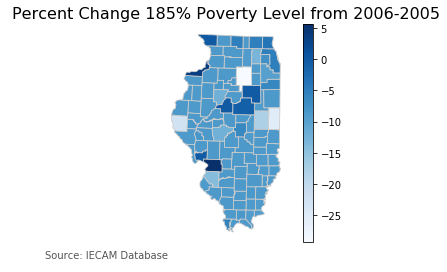

In [64]:
# set a variable that will call whatever column we want to visualise on the map
variable = '2006'

# set the range for the choropleth
#vmin, vmax = -50, 100
vmin, vmax = merged.describe().loc[['min','max'],'2006']


print(vmin, vmax)
# create figure and axes for Matplotlib
#fig, ax = plt.subplots(1, figsize=(10, 6))
fig, ax = plt.subplots(1)


# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')
# add a title
ax.set_title('Percent Change 185% Poverty Level from 2006-2005', \
              fontdict={'fontsize': '16',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: IECAM Database',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
#fig.savefig('testmap.png', dpi=300)


#### Geopandas instructions manual.

REading the instructions from geopandas docs (http://geopandas.org/mapping.html), I found out I can make the figures slightly different. See example below. In this case I am not defining the figure size.


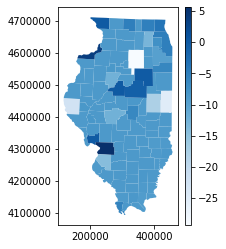

In [65]:
# set a variable that will call whatever column we want to visualise on the map
variable = '2006'

# set the range for the choropleth
#vmin, vmax = -50, 100
vmin, vmax = merged.describe().loc[['min','max'],'2006']


from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax1 = plt.subplots(1,1)

divider = make_axes_locatable(ax1)

cax = divider.append_axes('right', size='5%', pad=0.1)

merged.plot(column='2006', ax=ax1, legend=True, cax=cax, cmap='Blues')



In order to iterate through the columns, we will need a list of strings to call the name of each column. Let’s create a list variable containing the year of each column (formatted as a string). Let’s also set an output path so that all of our maps are saved to one folder.


In [66]:
# save all the maps in the charts folder
output_path = 'charts/maps'

# counter for the for loop
i = 0

# list of years (which are the column names at the moment)
list_of_years = ['2006','2007','2008','2009','2010','2011','2012','2013',
                 '2014', '2015', '2016']


Finally, before we create the maps we want to set a consistent global variable for the vmin and max values. This sets the value for the colour range. If you don’t set this beforehand, Matplotlib will change the range of the choropleth each time the for loop iterates, so it will be harder to see how values have increased or decreased over time.


### To better show the change for every year try to normalize the percent change with respect to one specific year.


let's nomralize the percent changes to the percent change from year 2006-2005



In [89]:
merged.describe()

,pop05,fpl50,fpl50_0,fpl50_1,fpl50_2,fpl50_3,fpl50_4,fpl50_5,fpl100,fpl100_0,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,...,101.000000,101.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,9861.372549,1023.715686,165.372549,167.039216,172.166667,173.196078,172.715686,173.284314,2139.009804,345.539216,...,5.784673,-11.493004,12.950362,-0.749483,3.968755,-1.336000,-2.936923,-1.837014,-1.100730,-1.604295
std,41687.243412,4987.510443,830.999791,828.401932,842.991304,836.403629,824.973271,823.997541,10257.974319,1711.952771,...,107.912455,120.662664,20.456348,15.272209,9.386412,12.614628,10.213944,2.196230,2.003847,12.480461
min,249.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,7.000000,...,-241.330137,-1210.924866,-36.630037,-39.943074,-25.986842,-44.585987,-27.586207,-9.189189,-8.653846,-32.067511
25%,1032.250000,84.000000,12.500000,14.000000,14.000000,13.250000,15.000000,15.250000,190.500000,29.250000,...,-0.962947,-1.183516,-0.245688,-10.422606,-1.691088,-7.761137,-8.573034,-2.861130,-1.847967,-8.384477
50%,1787.000000,211.500000,34.000000,34.000000,36.500000,36.500000,36.500000,37.000000,403.000000,63.000000,...,-0.610300,0.204060,10.153074,-0.481403,3.148731,-0.706834,-2.818392,-1.760752,-0.929259,-1.804387
75%,4129.250000,562.250000,88.750000,89.500000,97.000000,95.500000,94.500000,91.500000,1015.500000,161.250000,...,-0.291566,1.870695,23.084906,7.189590,8.287558,5.708567,1.800106,-0.486039,-0.028918,3.783515
max,409314.000000,50124.000000,8364.000000,8332.000000,8475.000000,8402.000000,8282.000000,8269.000000,102877.000000,17202.000000,...,1041.317669,36.135942,79.561316,57.024793,34.579439,30.516432,33.928571,2.485380,3.260870,53.684211


In [112]:
#divide all years by 2006 column values
merged_normalized = merged.reset_index()
merged_normalized[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']] = merged_normalized[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']].div(merged['2006'].values, axis=0)
#merged_normalized.loc[['2006','2007','2008',2009']]= merged_normalized.iloc[:,4:].div(merged_normalized.loc['2006'].values, axis=0)

merged_normalized.describe()

,pop05,fpl50,fpl50_0,fpl50_1,fpl50_2,fpl50_3,fpl50_4,fpl50_5,fpl100,fpl100_0,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,9861.372549,1023.715686,165.372549,167.039216,172.166667,173.196078,172.715686,173.284314,2139.009804,345.539216,...,5.784673,-11.493004,12.741415,-0.824773,3.959479,-1.158687,-2.957180,-1.812929,-1.081414,-1.342088
std,41687.243412,4987.510443,830.999791,828.401932,842.991304,836.403629,824.973271,823.997541,10257.974319,1711.952771,...,107.912455,120.662664,20.448693,15.329344,9.432757,12.549151,10.262827,2.193603,2.004276,12.257106
min,249.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,7.000000,...,-241.330137,-1210.924866,-36.630037,-39.943074,-25.986842,-44.585987,-27.586207,-9.189189,-8.653846,-32.067511
25%,1032.250000,84.000000,12.500000,14.000000,14.000000,13.250000,15.000000,15.250000,190.500000,29.250000,...,-0.962947,-1.183516,-0.418410,-10.443864,-1.799486,-7.473118,-8.633094,-2.860548,-1.782893,-7.630522
50%,1787.000000,211.500000,34.000000,34.000000,36.500000,36.500000,36.500000,37.000000,403.000000,63.000000,...,-0.610300,0.204060,10.034602,-0.711549,3.041647,-0.620018,-2.902410,-1.750000,-0.921435,-1.737116
75%,4129.250000,562.250000,88.750000,89.500000,97.000000,95.500000,94.500000,91.500000,1015.500000,161.250000,...,-0.291566,1.870695,22.978723,7.301173,8.291457,5.719707,1.818182,-0.482625,0.000000,3.810119
max,409314.000000,50124.000000,8364.000000,8332.000000,8475.000000,8402.000000,8282.000000,8269.000000,102877.000000,17202.000000,...,1041.317669,36.135942,79.561316,57.024793,34.579439,30.516432,33.928571,2.485380,3.260870,53.684211


In [114]:
#let's inspect some values
merged_normalized.iloc[:,53:].describe()

#It seems to be that the way I did it is not the best way yto make the comparisons. Think more about it.


,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,101.0,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,1.0,5.784673,-11.493004,12.741415,-0.824773,3.959479,-1.158687,-2.957180,-1.812929,-1.081414,-1.342088
std,0.0,107.912455,120.662664,20.448693,15.329344,9.432757,12.549151,10.262827,2.193603,2.004276,12.257106
min,1.0,-241.330137,-1210.924866,-36.630037,-39.943074,-25.986842,-44.585987,-27.586207,-9.189189,-8.653846,-32.067511
25%,1.0,-0.962947,-1.183516,-0.418410,-10.443864,-1.799486,-7.473118,-8.633094,-2.860548,-1.782893,-7.630522
50%,1.0,-0.610300,0.204060,10.034602,-0.711549,3.041647,-0.620018,-2.902410,-1.750000,-0.921435,-1.737116
75%,1.0,-0.291566,1.870695,22.978723,7.301173,8.291457,5.719707,1.818182,-0.482625,0.000000,3.810119
max,1.0,1041.317669,36.135942,79.561316,57.024793,34.579439,30.516432,33.928571,2.485380,3.260870,53.684211


In [33]:
# set the range for the choropleth
vmin, vmax = -30, 60


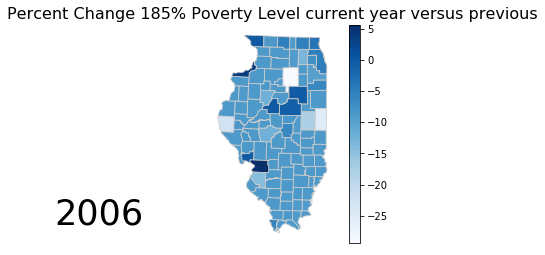

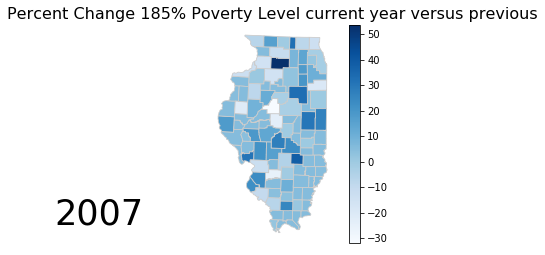

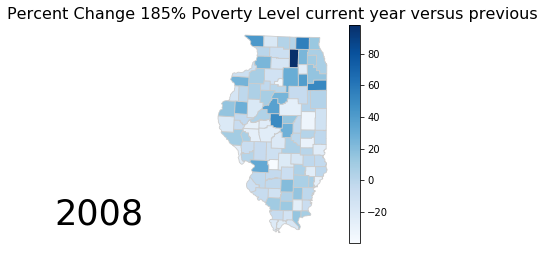

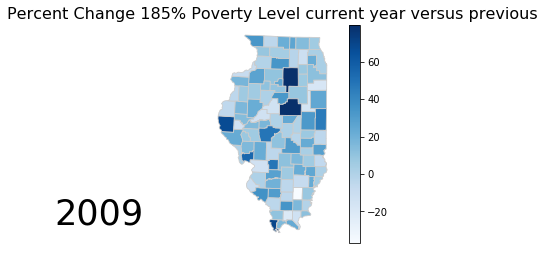

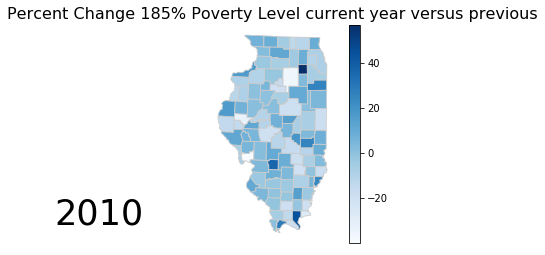

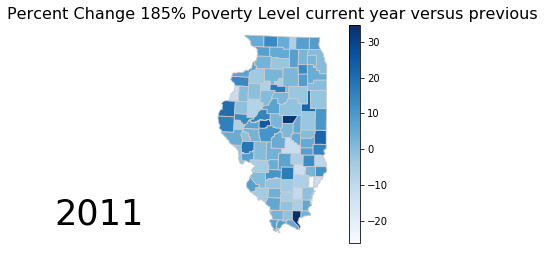

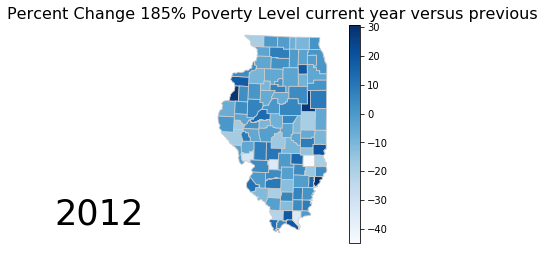

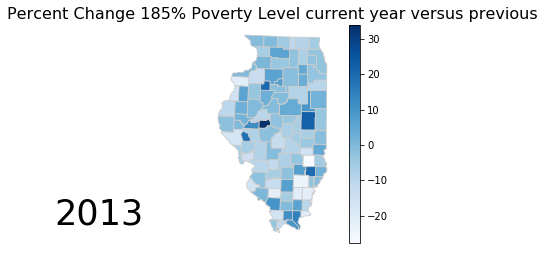

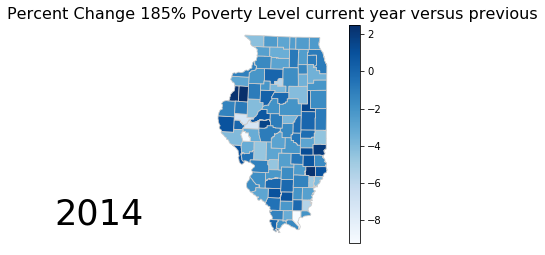

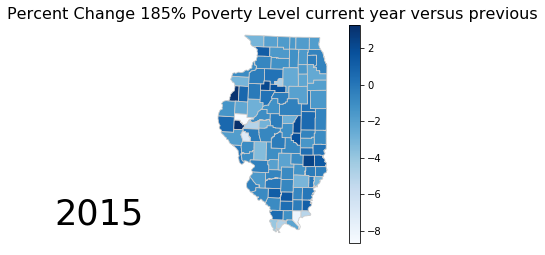

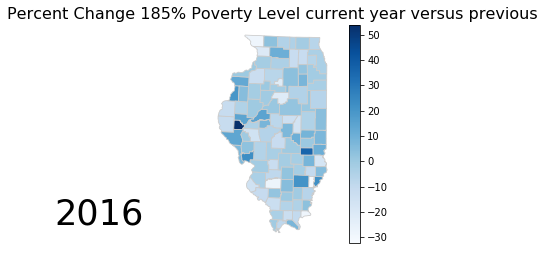

In [68]:
import os
# start the for loop to create one map per year
for year in list_of_years:
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    #fig = merged.plot(column=year, cmap='Blues', figsize=(10,10), linewidth=0.8, edgecolor='0.8', 
    #                  vmin=vmin, vmax=vmax,legend=True, 
    #                  norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    vmin, vmax = merged.describe().loc[['min','max'],year]

    fig = merged.plot(column=year, cmap='Blues', linewidth=0.8, edgecolor='0.8', 
                      legend=True)

    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Percent Change 185% Poverty Level current year versus previous', \
              fontdict={'fontsize': '16',
                         'fontweight' : '3'})
    fig.annotate(year, xy=(0.1, .225), xycoords='figure fraction',
                 horizontalalignment='left', verticalalignment='top',fontsize=35)
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, year+'_poverty.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

## Make the gif

Let's try using moviePy. I need to pip instal moviePy for python 3 (https://zulko.github.io/moviepy/index.html)

I discovered MoviePy while looking to solve this problem and it looks very promising. While it looks like it's primarily designed to make or edit videos it has gif making capability. What's more it can even use ImageMagick as a back end for image conversion (otherwise it uses imageio).


In [75]:
import glob
import moviepy.editor as mpy

gif_name = 'poverty'
fps = 0.3
file_list = ['./charts/maps/2006_poverty.jpg','./charts/maps/2007_poverty.jpg','./charts/maps/2008_poverty.jpg',
             './charts/maps/2009_poverty.jpg','./charts/maps/2010_poverty.jpg','./charts/maps/2011_poverty.jpg','./charts/maps/2012_poverty.jpg',
             './charts/maps/2013_poverty.jpg', './charts/maps/2014_poverty.jpg','./charts/maps/2015_poverty.jpg','./charts/maps/2016_poverty.jpg']
#file_list = glob.glob('./charts/maps/*.jpg') # Get all the pngs in the current directory
print(file_list)

['./charts/maps/2006_poverty.jpg', './charts/maps/2007_poverty.jpg', './charts/maps/2008_poverty.jpg', './charts/maps/2009_poverty.jpg', './charts/maps/2010_poverty.jpg', './charts/maps/2011_poverty.jpg', './charts/maps/2012_poverty.jpg', './charts/maps/2013_poverty.jpg', './charts/maps/2014_poverty.jpg', './charts/maps/2015_poverty.jpg', './charts/maps/2016_poverty.jpg']


In [76]:
# Sort the images by #, this may need to be tweaked for your use case
#list.sort(file_list, key=lambda x: int(x.split('_')[0].split('.jpg')[0])) 
clip = mpy.ImageSequenceClip(file_list, fps=fps)
clip.write_gif('{}.gif'.format(gif_name), fps=fps)

t:  18%|█▊        | 2/11 [00:00<00:00, 10.91it/s, now=None]

MoviePy - Building file poverty.gif with imageio.


After making the movie and looking at the density maps, it call the attention to Dawn that the percent change between 2014-2013, 2015-2014 look like they do not show any change in all the counties.

I will look at the dataframe that contains the untouch/raw data to see if I still see the same little variation.

The raw data is in the df_children_five_under dataframe

In [35]:
df_children_five_under.head()

,County,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Adams,1972,1528,1801,1447,2422,2067,2396,2405,2361,2383,2399,2130
2,Alexander,378,357,364,285,484,489,526,591,570,571,548,544
3,Bond,886,809,852,516,766,1047,1093,721,638,609,597,527
4,Boone,1446,1320,1748,1808,2280,1977,1860,1721,1539,1502,1479,1412
5,Brown,179,164,173,162,139,119,112,92,92,92,95,146


Let's look at some stats for the years 2013, 2014 and 2015

In [36]:
#Convert all columns to string
df_children_five_under.columns = list(map(str, df_children_five_under.columns))

df_children_five_under[['2013','2014','2015']].describe()

,2013,2014,2015
count,104.000000,104.000000,104.000000
mean,5521.865385,5455.307692,5414.451923
std,21658.803418,21469.052987,21355.198228
min,92.000000,92.000000,91.000000
25%,424.750000,417.750000,416.000000
50%,803.000000,784.000000,773.500000
75%,2077.750000,2051.500000,2046.250000
max,180068.000000,178526.000000,177604.000000


In [37]:
#Calculate the diference for these 3 years
#First we need to reset the index. We will create a new Dataframe with the data we are interested
df_children_five_under_2013_2015 = df_children_five_under[['County','2012','2013','2014','2015']].reset_index(drop=True)



In [38]:
df_children_five_under_2013_2015['2014-2013'] = df_children_five_under_2013_2015['2014'] - df_children_five_under_2013_2015['2013']
df_children_five_under_2013_2015['2015-2014'] = df_children_five_under_2013_2015['2015'] - df_children_five_under_2013_2015['2014']
df_children_five_under_2013_2015['2013-2012'] = df_children_five_under_2013_2015['2013'] - df_children_five_under_2013_2015['2012']

df_children_five_under_2013_2015.head()

,County,2012,2013,2014,2015,2014-2013,2015-2014,2013-2012
0,Adams,2405,2361,2383,2399,22,16,-44
1,Alexander,591,570,571,548,1,-23,-21
2,Bond,721,638,609,597,-29,-12,-83
3,Boone,1721,1539,1502,1479,-37,-23,-182
4,Brown,92,92,92,95,0,3,0


In [52]:
test = df_children_five_under.iloc[:,1:].pct_change(axis='columns').drop(['2005'],axis=1).mul(100)

test.describe()
#df_children_five_under.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,-8.455066,5.448445,0.584918,12.738246,-0.863307,3.909060,-1.295373,-2.925181,-1.818149,-1.089487,-1.641262
std,4.304089,13.222822,21.793500,20.316621,15.157608,9.306035,12.495200,10.115743,2.179012,1.985937,12.361567
min,-29.295154,-31.766860,-39.436620,-36.630037,-39.943074,-25.986842,-44.585987,-27.586207,-9.189189,-8.653846,-32.067511
25%,-8.747312,0.379906,-14.093152,-0.432675,-10.521070,-1.474292,-7.569124,-8.452916,-2.860742,-1.804584,-7.881840
50%,-8.688799,5.286905,-1.655372,9.516016,-1.148586,2.938349,-0.486896,-2.818392,-1.743004,-0.890166,-1.973565
75%,-8.607357,6.291491,10.419694,23.014118,6.966422,8.279761,5.686287,1.763954,-0.492865,-0.086755,3.730307
max,5.586668,53.488372,97.920380,79.561316,57.024793,34.579439,30.516432,33.928571,2.485380,3.260870,53.684211


Looking at the min and max percent variation for the years 2013-2014 and 2014-2015, the min is about 3 times smaller than previous years, and the max is 15 times smaller. The standard deviation for the state is 5 times smaller for the state.
